## API integrating the EBRAINS KG with TVB using `siibra-python`.
### Focuses on retrieving and creating TVB Structural and Functional Connectivities
##### <font color='red'>Note: For the API to work, an EBRAINS authentication token needs to be set or the API should be used in an EBRAINS environment.</font>

### Imports and setup

In [1]:
# Add an EBRAINS token
import os
os.environ['HBP_AUTH_TOKEN'] = ''

In [1]:
# alterantively, use siibra service for authentication into EBRAINS
import siibra
siibra.fetch_ebrains_token()

[siibra:INFO] Version: 0.4a35
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


***
To continue, please go to https://iam.ebrains.eu/auth/realms/hbp/device?user_code=NIKS-GGAO
***
ebrains token successfuly set.


## Using the API

## 1. Retrieving *both* Structural and Functional Connectivities

##### The results of this method are 2 **dictionaries**, containing either structural or functional connectivities. Each dictionary has as:
##### **- key**: the subject id
##### **- value**: the Structural/Functional TVB Connectivity for the corresponding subject

In [2]:
from tvb.adapters.creators.siibra_base import get_connectivities_from_kg
struct_conn_dict, func_conn_dict = get_connectivities_from_kg('human', '2.9', 'HCP', '000-001', True)

Loading preconfigured Parcellation instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 88.47it/s]

2023-03-22 14:12:50,094 - INFO - tvb.adapters.creators.siibra_base - Using atlas Multilevel Human Atlas and parcellation Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9)



Loading preconfigured StreamlineCounts instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2988.11it/s]
Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.55it/s]
Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


2023-03-22 14:12:57,410 - INFO - tvb.adapters.creators.siibra_base - WEIGHTS for subject 000 retrieved successfully.
2023-03-22 14:12:57,499 - INFO - tvb.adapters.creators.siibra_base - WEIGHTS for subject 001 retrieved successfully.


Loading preconfigured StreamlineLengths instances: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1506.39it/s]
Matching StreamlineLengths to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 150.08it/s]

2023-03-22 14:12:57,666 - INFO - tvb.adapters.creators.siibra_base - TRACTS for subject 000 retrieved successfully.


2023-03-22 14:12:57,759 - INFO - tvb.adapters.creators.siibra_base - TRACTS for subject 001 retrieved successfully.
2023-03-22 14:12:57,760 - INFO - tvb.adapters.creators.siibra_base - Computing hemispheres for regions
2023-03-22 14:12:57,761 - INFO - tvb.adapters.creators.siibra_base - Computing positions for regions


Loading preconfigured Map instances:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 36/47 [00:00<00:00, 102.19it/s][siibra:WARNING] Non unique indices encountered in Map: rat waxholmv1 01 labelled: {MapIndex(volume:0, label:2, fragment:None)}


2023-03-22 14:12:58,273 - WARNING - siibra - Non unique indices encountered in Map: rat waxholmv1 01 labelled: {MapIndex(volume:0, label:2, fragment:None)}


Loading preconfigured Map instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 111.49it/s]
[siibra:WARNING] Map registry contains multiple classes: SparseMap, Map


2023-03-22 14:12:58,284 - WARNING - siibra - Map registry contains multiple classes: SparseMap, Map
2023-03-22 14:22:28,263 - INFO - tvb.adapters.creators.siibra_base - Computing TVB Connectivities
2023-03-22 14:22:28,271 - INFO - tvb.adapters.creators.siibra_base - Using atlas Multilevel Human Atlas and parcellation Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9)


Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]
Loading preconfigured FunctionalConnectivity instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2202.26it/s]
Matching FunctionalConnectivity to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 118.71it/s]
Matching FunctionalConnectivity to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


##### There is **1** Structural connectivity for each subject:

In [3]:
print(f'Structural connectivities:')
for sc in struct_conn_dict.items():
    print(sc)

Structural connectivities:
('000', <tvb.datatypes.connectivity.Connectivity object at 0x00000211241F7BE0>)
('001', <tvb.datatypes.connectivity.Connectivity object at 0x0000021123FFA2F0>)


##### And **5** Functional connectivities for each subject:

In [4]:
print(f'Functional connectivities:')
for fc in func_conn_dict.items():
    print(fc)

Functional connectivities:
('000', [<tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021125107DC0>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021125107250>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x00000211244DFFD0>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x00000211244DFE80>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021123F27F10>])
('001', [<tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021123F25270>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021123F25540>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021123F25480>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021123F26B00>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x0000021123F27190>])


#### After retrieving the connectivities, we can access and use them as any other connectivity from TVB:

In [5]:
sc_conn = struct_conn_dict['000']
sc_conn

,value
Number of connections,39366
Number of regions,294
Undirected,True
areas is None,True
tract_lengths,"[min, median, max] = [0, 0, 248.601] dtype = float64 shape = (294, 294)"
tract_lengths (connections),"[min, median, max] = [2.31886, 114.963, 248.601] dtype = float64 shape = (39366,)"
tract_lengths-non-zero,"[min, median, max] = [2.31886, 114.963, 248.601] dtype = float64 shape = (39366,)"
weights,"[min, median, max] = [0, 0, 266221] dtype = float64 shape = (294, 294)"
weights-non-zero,"[min, median, max] = [1, 7, 266221] dtype = float64 shape = (39366,)"


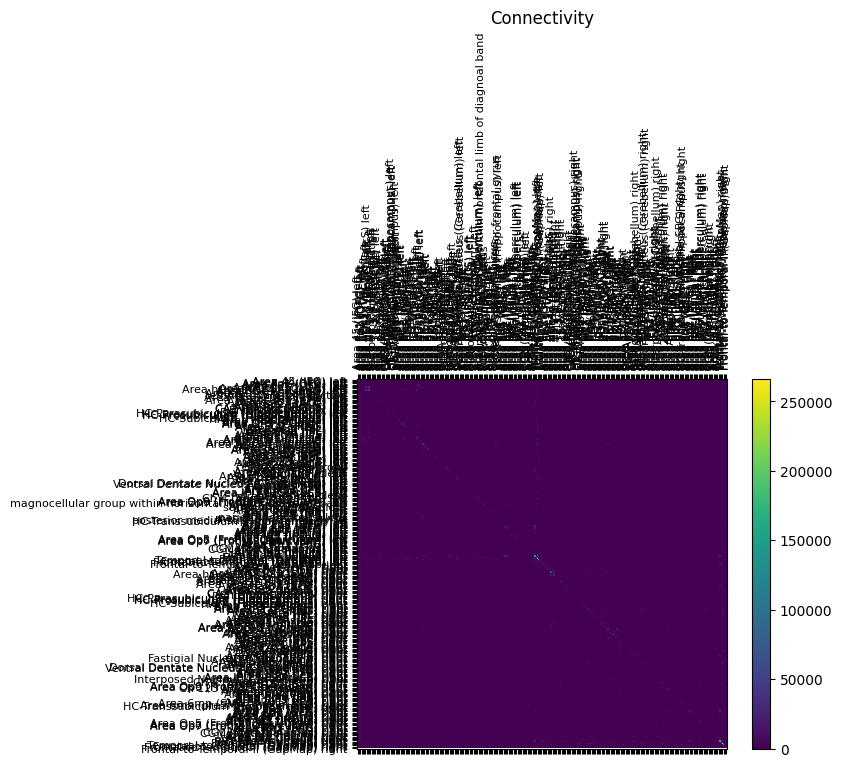

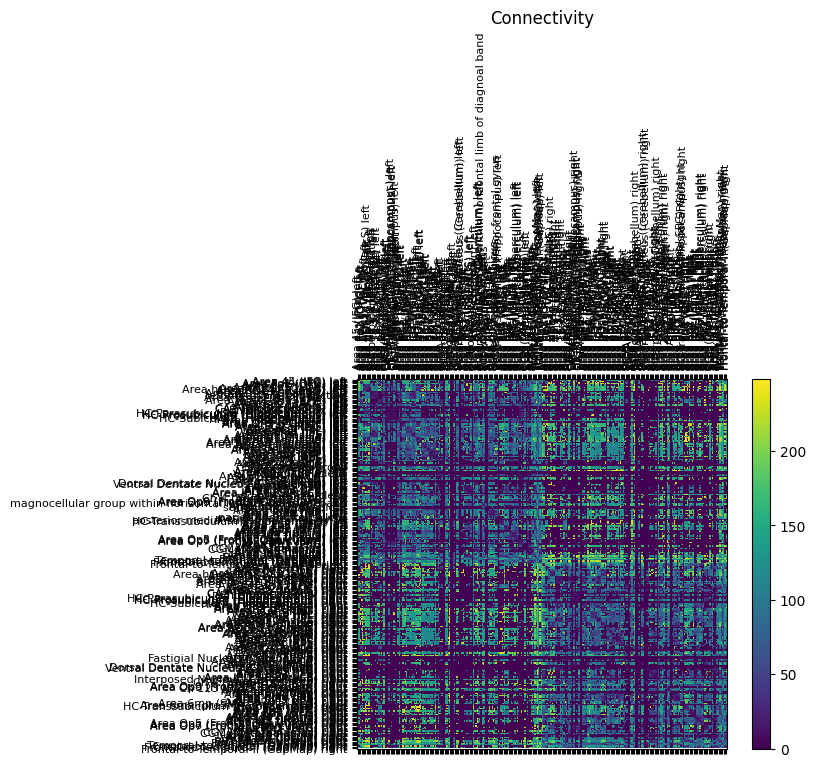

In [6]:
from tvb.simulator.plot.tools import plot_connectivity
plot_connectivity(sc_conn)

---

## 2. Retrieving *just* Structural Connectivities

#### 2.1 Using the common API for Structural and Functional Connectivities:
####     The API from 1. can be used to extract just Structural connectivities, by setting the **last flag** (mentioning the option to also compute Functional connectivities) to **False**

In [8]:
struct_conn_dict, func_conn_dict = get_connectivities_from_kg('human', '2.9', '1000BRAINS', '0002', False)

2023-03-22 14:34:18,391 - INFO - tvb.adapters.creators.siibra_base - Using atlas Multilevel Human Atlas and parcellation Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9)


Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]
Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

2023-03-22 14:34:18,402 - INFO - tvb.adapters.creators.siibra_base - WEIGHTS for subject 0002_1 retrieved successfully.
2023-03-22 14:34:18,403 - INFO - tvb.adapters.creators.siibra_base - WEIGHTS for subject 0002_2 retrieved successfully.



Matching StreamlineLengths to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|███████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

2023-03-22 14:34:18,407 - INFO - tvb.adapters.creators.siibra_base - TRACTS for subject 0002_1 retrieved successfully.
2023-03-22 14:34:18,407 - INFO - tvb.adapters.creators.siibra_base - TRACTS for subject 0002_2 retrieved successfully.
2023-03-22 14:34:18,409 - INFO - tvb.adapters.creators.siibra_base - Computing hemispheres for regions
2023-03-22 14:34:18,410 - INFO - tvb.adapters.creators.siibra_base - Computing positions for regions


2023-03-22 14:43:43,473 - INFO - tvb.adapters.creators.siibra_base - Computing TVB Connectivities


##### Now there is one Structural connectivity:

In [9]:
print(f'Structural connectivities:')
for sc in struct_conn_dict.items():
    print(sc)

Structural connectivities:
('0002_1', <tvb.datatypes.connectivity.Connectivity object at 0x0000021128CC1960>)
('0002_2', <tvb.datatypes.connectivity.Connectivity object at 0x00000211255970D0>)


##### And no Functional connectivities:

In [10]:
print(f'Functional connectivities: \n {func_conn_dict}')

Functional connectivities: 
 {}


#### 2.2 Using the custom API for Structural connectivities:

In [12]:
from tvb.adapters.creators.siibra_base import get_structural_connectivities_from_kg
struct_conn_dict = get_structural_connectivities_from_kg('human', '2.9', 'HCP', '002')

2023-03-23 09:58:25,688 - INFO - tvb.adapters.creators.siibra_base - Using atlas Multilevel Human Atlas and parcellation Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9)


Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|█████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 64198.53it/s]
Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

2023-03-23 09:58:25,832 - INFO - tvb.adapters.creators.siibra_base - WEIGHTS for subject 002 retrieved successfully.



Matching StreamlineLengths to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|███████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


2023-03-23 09:58:25,948 - INFO - tvb.adapters.creators.siibra_base - TRACTS for subject 002 retrieved successfully.
2023-03-23 09:58:25,948 - INFO - tvb.adapters.creators.siibra_base - Computing hemispheres for regions
2023-03-23 09:58:25,948 - INFO - tvb.adapters.creators.siibra_base - Computing positions for regions
2023-03-23 10:07:29,086 - INFO - tvb.adapters.creators.siibra_base - Computing TVB Connectivities


In [13]:
print(f'Structural connectivities:')
for sc in struct_conn_dict.items():
    print(sc)

Structural connectivities:
('002', <tvb.datatypes.connectivity.Connectivity object at 0x0000021128B37EE0>)


#### Again, the resulted connectivity could be used like any other TVB Connectivity

---

## 3. Retrieving *just* Functional Connectivities
#### Note: Functional Connectivities are represented as ConnectivityMeasures in TVB. This means that each FC will have an associated Structural Connectivity to it. 
#### For this reason, to extract any FC from siibra, we must also provide a dictionary of corresponding Structural Connectivities.

In [16]:
from tvb.adapters.creators.siibra_base import get_connectivity_measures_from_kg
func_conn_dict = get_connectivity_measures_from_kg('human', '2.9', 'HCP', '002', struct_conn_dict)

2023-03-23 11:35:42,580 - INFO - tvb.adapters.creators.siibra_base - Using atlas Multilevel Human Atlas and parcellation Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9)


Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]
Matching FunctionalConnectivity to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


In [17]:
print(f'Functional connectivities:')
for fc in func_conn_dict.items():
    print(fc)

Functional connectivities:
('002', [<tvb.datatypes.graph.ConnectivityMeasure object at 0x000002112A29E3E0>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x00000211244DFE80>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x00000211254F8580>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x00000211244DFFD0>, <tvb.datatypes.graph.ConnectivityMeasure object at 0x000002112BD9F8E0>])


In [18]:
# inspecting a Functional Connectivity
func_conn_dict['002'][0]